STEPS:

1. Create PPI network for each age group - sample 
2. Selectively remove top or bottom genes 
3. Calculate resilience of each network

In [10]:
import sys
import networkx as nx
import networkx.algorithms.approximation as nx_approx
import pandas as pd
import numpy as np
#from numexpr3 import evaluate as ev
from scipy.spatial.distance import cdist, pdist, squareform
import scipy.integrate as integrate
import time
import math
from decimal import Decimal

In [11]:
import biomart
from biomart import BiomartServer
import seaborn as sns

In [12]:
mart_df=pd.read_csv('mart_export_ensembl.txt')

In [13]:
mart_df.head()

,Gene stable ID,Gene stable ID version,Transcript stable ID,Transcript stable ID version,MGI symbol,Gene name,Protein stable ID,Protein stable ID version
0,ENSMUSG00000064336,ENSMUSG00000064336.1,ENSMUST00000082387,ENSMUST00000082387.1,mt-Tf,mt-Tf,NaN,NaN
1,ENSMUSG00000064337,ENSMUSG00000064337.1,ENSMUST00000082388,ENSMUST00000082388.1,mt-Rnr1,mt-Rnr1,NaN,NaN
2,ENSMUSG00000064338,ENSMUSG00000064338.1,ENSMUST00000082389,ENSMUST00000082389.1,mt-Tv,mt-Tv,NaN,NaN
3,ENSMUSG00000064339,ENSMUSG00000064339.1,ENSMUST00000082390,ENSMUST00000082390.1,mt-Rnr2,mt-Rnr2,NaN,NaN
4,ENSMUSG00000064340,ENSMUSG00000064340.1,ENSMUST00000082391,ENSMUST00000082391.1,mt-Tl1,mt-Tl1,NaN,NaN


In [14]:
ppi = pd.read_csv('clean_ppi_interactions.csv')

In [15]:
ppi.head()

,from,to
0,ENSMUSP00000000080,ENSMUSP00000078429
1,ENSMUSP00000000080,ENSMUSP00000078092
2,ENSMUSP00000000080,ENSMUSP00000078453
3,ENSMUSP00000000080,ENSMUSP00000078490
4,ENSMUSP00000000080,ENSMUSP00000078682


In [16]:

ppi.rename(columns={"from": "source", "to": "target"},inplace=True)

# Centrality in PPI network

I found other centrality network measures that might better capture this idea of ' importance of the node'.


https://en.wikipedia.org/wiki/Centrality#Eigenvector_centrality

In [17]:
G = nx.from_pandas_edgelist(ppi)
centrality = nx.eigenvector_centrality(G)
#print(['%s %0.2f'%(node,centrality[node]) for node in centrality])

In [18]:
print(max(centrality.values()))

0.050798294277257815


In [19]:
max_key = max(centrality, key=centrality.get)
print(max_key)

ENSMUSP00000114180


In [20]:
import operator

In [21]:
sorted_d = dict( sorted(centrality.items(), key=operator.itemgetter(1),reverse=True))
#print('Dictionary in descending order by value : ',sorted_d)

In [22]:
dict_items = sorted_d.items()
top_twenty = list(dict_items)[:20]
#print(dict(top_twenty))
top_proteins=list(dict(top_twenty).keys())

In [23]:
print(top_twenty)

[('ENSMUSP00000114180', 0.050798294277257815), ('ENSMUSP00000019649', 0.05073071036090438), ('ENSMUSP00000082548', 0.044996997428199105), ('ENSMUSP00000035808', 0.04405853680733943), ('ENSMUSP00000108521', 0.04403206417216863), ('ENSMUSP00000120461', 0.04386101896633954), ('ENSMUSP00000083555', 0.043553985027698174), ('ENSMUSP00000031542', 0.04342407595216797), ('ENSMUSP00000031540', 0.04335567780792669), ('ENSMUSP00000060082', 0.04318700313144521), ('ENSMUSP00000035588', 0.043001197951154216), ('ENSMUSP00000079198', 0.04295586412799321), ('ENSMUSP00000100577', 0.04233304747476257), ('ENSMUSP00000042835', 0.04228838005054171), ('ENSMUSP00000021698', 0.04029153510478491), ('ENSMUSP00000024739', 0.039705097475067265), ('ENSMUSP00000080608', 0.03889287129153483), ('ENSMUSP00000001780', 0.038742529252937676), ('ENSMUSP00000006911', 0.03856234514128252), ('ENSMUSP00000004990', 0.03771569580876318)]


In [24]:
sorted_a = dict( sorted(centrality.items(), key=operator.itemgetter(1)))
#print('Dictionary in ascending order by value : ',sorted_a)
dict_items = sorted_a.items()
bottom_twenty = list(dict_items)[:20]
print(dict(bottom_twenty))
bottom_proteins=list(dict(bottom_twenty).keys())

{'from': 2.9037995802425446e-36, 'to': 2.9037995802425446e-36, 'ENSMUSP00000070037': 1.3411701922574714e-14, 'ENSMUSP00000109261': 1.7036135871141677e-11, 'ENSMUSP00000036724': 3.036425970134627e-11, 'ENSMUSP00000069700': 4.171961603758946e-10, 'ENSMUSP00000044360': 1.7808495025284642e-09, 'ENSMUSP00000058412': 4.1813127334007995e-09, 'ENSMUSP00000064103': 6.05427638709569e-09, 'ENSMUSP00000119782': 9.609403360715773e-09, 'ENSMUSP00000069947': 2.165880309363221e-08, 'ENSMUSP00000108462': 2.16588164947818e-08, 'ENSMUSP00000056228': 2.6387081778797147e-08, 'ENSMUSP00000131092': 2.6651879604353945e-08, 'ENSMUSP00000102131': 3.101222465899841e-08, 'ENSMUSP00000136157': 3.1174893382709664e-08, 'ENSMUSP00000109654': 3.452249903895671e-08, 'ENSMUSP00000137062': 3.858808549956903e-08, 'ENSMUSP00000080582': 4.365187319444785e-08, 'ENSMUSP00000075543': 5.287468523834023e-08}


In [26]:
mgi_corresponding_top=[]
for i in top_proteins:
    if i in list(mart_df['Protein stable ID']):
        myindex=mart_df.index[(mart_df['Protein stable ID'] == i)].tolist()
        geneid=mart_df.iloc[myindex[0],4]
        mgi_corresponding_top.append(str(geneid))

        
mgi_corresponding_bottom=[]
for i in bottom_proteins:
    if i in list(mart_df['Protein stable ID']):
        myindex=mart_df.index[(mart_df['Protein stable ID'] == i)].tolist()
        geneid=mart_df.iloc[myindex[0],4]
        mgi_corresponding_bottom.append(str(geneid))

# Finding proteins that map to preserved and compromised gene lists
1. converting gene symbols to ensemble ids, then pulling out their centrality values.

In [30]:
top_path='D:/OneDrive - University of Pittsburgh/PhD proposal/Noisy channel research/fig2/topTG_genes_0.4_0.2diff.csv'
top_genes=pd.read_csv(top_path)
preserved_genes=list(top_genes['top_genes'])

In [31]:
bottom_path='D:/OneDrive - University of Pittsburgh/PhD proposal/Noisy channel research/fig2/bottomTG_genes_0.4_0.2diff.csv'
bottom_genes=pd.read_csv(bottom_path)
compromised_genes=list(bottom_genes['bottom_genes'])

In [32]:
mart_df.tail()

,Gene stable ID,Gene stable ID version,Transcript stable ID,Transcript stable ID version,MGI symbol,Gene name,Protein stable ID,Protein stable ID version
142455,ENSMUSG00000074656,ENSMUSG00000074656.13,ENSMUST00000166171,ENSMUST00000166171.8,Eif2s2,Eif2s2,ENSMUSP00000128257,ENSMUSP00000128257.2
142456,ENSMUSG00000074656,ENSMUSG00000074656.13,ENSMUST00000147136,ENSMUST00000147136.2,Eif2s2,Eif2s2,NaN,NaN
142457,ENSMUSG00000074656,ENSMUSG00000074656.13,ENSMUST00000161172,ENSMUST00000161172.3,Eif2s2,Eif2s2,ENSMUSP00000125248,ENSMUSP00000125248.2
142458,ENSMUSG00000074656,ENSMUSG00000074656.13,ENSMUST00000135524,ENSMUST00000135524.2,Eif2s2,Eif2s2,NaN,NaN
142459,ENSMUSG00000098640,ENSMUSG00000098640.3,ENSMUST00000185009,ENSMUST00000185009.2,Gm14214,Gm14214,NaN,NaN


In [33]:
print('preserved genes before ppi mapping:',len(preserved_genes))
print('compromised genes before ppi mapping:',len(compromised_genes))

preserved genes before ppi mapping: 13
compromised genes before ppi mapping: 54


In [34]:
ppi_preserved_genes=list(set(preserved_genes).intersection(list(mart_df['MGI symbol'])))
ppi_compromised_genes=list(set(compromised_genes).intersection(list(mart_df['MGI symbol'])))

print('preserved genes after ppi mapping:',len(ppi_preserved_genes))
print('compromised genes after ppi mapping:',len(ppi_compromised_genes))

preserved genes after ppi mapping: 13
compromised genes after ppi mapping: 41


In [35]:
# getting the first element that matches the mapping criteria:
ens_preserved_gene=[]
ens_compromised_gene=[]

for i in ppi_preserved_genes:
    ens_preserved_gene.append(mart_df.loc[mart_df['MGI symbol'] == i, 'Protein stable ID'].iloc[0])
    
for i in ppi_compromised_genes:
    ens_compromised_gene.append(mart_df.loc[mart_df['MGI symbol'] == i, 'Protein stable ID'].iloc[0])

In [36]:
#ens_preserved_gene

In [37]:
#ens_compromised_gene

In [38]:
clean_ens_pg = [x for x in ens_preserved_gene if str(x) != 'nan']
clean_ens_cg = [x for x in ens_compromised_gene if str(x) != 'nan']

In [39]:
# WOW some proteins in BIOMART are not present in the mouse PPI dictionary!! -_-

top_centrality={}
bottom_centrality={}

for i in clean_ens_pg:
    try:
        print('top ',i,sorted_d[i])
        top_centrality[i]=sorted_d[i]
    except KeyError:
        pass

for i in clean_ens_cg:
    try:
        print('bottom ',i,sorted_d[i])
        bottom_centrality[i]=sorted_d[i]
    except KeyError:
        pass

top  ENSMUSP00000098768 0.0074334414340244
top  ENSMUSP00000114180 0.050798294277257815
top  ENSMUSP00000026845 0.007186372837651325
top  ENSMUSP00000128308 0.004007034426631018
top  ENSMUSP00000029812 0.023319693396456117
top  ENSMUSP00000009435 0.0006999176094829773
top  ENSMUSP00000057815 0.006124589031878584
top  ENSMUSP00000021674 0.028605685780290643
top  ENSMUSP00000096877 0.0008262571793385613
top  ENSMUSP00000000579 0.009177466570649977
bottom  ENSMUSP00000110489 0.0036822913361765812
bottom  ENSMUSP00000028735 0.005113427400678447
bottom  ENSMUSP00000069616 0.02432298167977559
bottom  ENSMUSP00000099733 0.0016964738539705013
bottom  ENSMUSP00000003687 0.004875070124774992
bottom  ENSMUSP00000031383 0.010519527301217853
bottom  ENSMUSP00000102710 0.003936298578768505
bottom  ENSMUSP00000021692 0.022552836654222506
bottom  ENSMUSP00000099576 0.0024594010267871397
bottom  ENSMUSP00000035539 0.0022379662084743477
bottom  ENSMUSP00000039586 0.006483042392028455
bottom  ENSMUSP0000

In [44]:
#stats.shapiro(top_centrality)

C:\Users\sruth\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


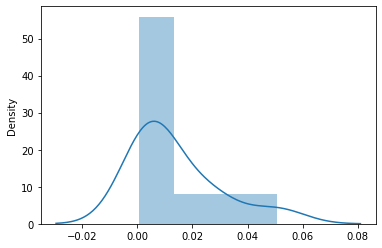

In [50]:
sns.distplot(list(top_centrality.values()))

C:\Users\sruth\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


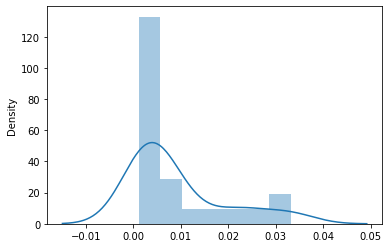

In [48]:
sns.distplot(list(bottom_centrality.values()))

In [52]:
from itertools import combinations
from scipy.stats import ttest_ind
#for top_centrality, bottom_centrality in combinations(data.keys(), 2):
t, p = ttest_ind(list(top_centrality.values()), list(bottom_centrality.values()))
print (t,p)

1.041166737387398 0.30585057498983864


# Visualization of graph with color bars
https://aksakalli.github.io/2017/07/17/network-centrality-measures-and-their-visualization.html

https://stackoverflow.com/questions/29838746/how-to-draw-subgraph-using-networkx

https://stackoverflow.com/questions/35205191/draw-two-graph-in-different-positions-in-networkx


# Eigen vector centrality in literature visualization

https://www.pnas.org/content/115/52/E12201 (Supplemental file transfromation for colorbar)

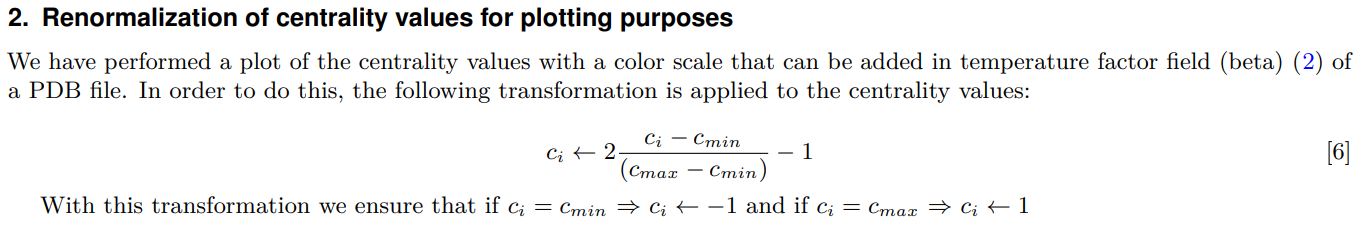

In [53]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# for Notebook
%matplotlib inline

In [54]:
preserved = clean_ens_pg #nodes in preserved graph
# TAKES TOOOOOOO LONG TO RUN ~15 MINS - so commented
# pos = nx.spring_layout(G, seed=675)  #setting the positions with respect to G, not 'leftG'.
leftG= G.subgraph(preserved) 


In [55]:
compromised = clean_ens_cg #nodes in preserved graph
# TAKES TOOOOOOO LONG TO RUN ~15 MINS - so commented
# pos = nx.spring_layout(G, seed=675)  #setting the positions with respect to G, not 'leftG'.
rightG= G.subgraph(compromised) 


In [56]:
def draw1(leftG, rightG, measures_pg, measures_cg, measure_name):
     
    pos1 = nx.spring_layout(leftG, k=0.5, iterations=30)
    pos2 = nx.spring_layout(rightG, k=0.5, iterations=30)
    
#     for k,v in pos2.items():
#     # Shift the x values of every node by 10 to the right
#         v[0] = v[0] +20
    
    
    fig, axes = plt.subplots(nrows=1, ncols=2)
    
#     for ax in axes.flat:
#         im = ax.imshow(np.random.random((10,10)), vmin=0, vmax=1)

#         fig.colorbar(im, ax=axes.ravel().tolist())
    
    plt.subplot(121)
    im = nx.draw_networkx_nodes(leftG, pos1, node_size=300, cmap=plt.cm.Spectral, vmin= -0.6, vmax=0.6,
                                   node_color=list(measures_pg.values()),
                                   nodelist=measures_pg.keys())
    im.set_edgecolor('k')
    #Lnodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1))
    # labels = nx.draw_networkx_labels(G, pos)
    Ledges = nx.draw_networkx_edges(leftG, pos1)
    plt.axis('off')
    
    plt.subplot(122)    
    im = nx.draw_networkx_nodes(rightG, pos2, node_size=300, cmap=plt.cm.Spectral, vmin= -0.6, vmax=0.6,
                                   node_color=list(measures_cg.values()),
                                   nodelist=measures_cg.keys())
    im.set_edgecolor('k')
    #Rnodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1, base=10))
    # labels = nx.draw_networkx_labels(G, pos)
    Redges = nx.draw_networkx_edges(rightG, pos2)

    
   
    plt.title(measure_name)
    plt.axis('off')
       
    cbaxes = fig.add_axes([1.0, 0.1, 0.03, 0.8])  
    cb=fig.colorbar(im, ax=axes.ravel().tolist(),  cax = cbaxes)
    cb.ax.tick_params(labelsize=20)
    #cbar.ax.tick_params(labelsize=10) 
#     plt.colorbar(Lnodes)

#     plt.colorbar(Rnodes)
    fig.set_size_inches(15, 8)
    fig.savefig('testfig.png', dpi=200)
    plt.show()
    
    

In [62]:
def tranform_evc(measures_pg,measures_cg):
    before_t_pg=list(measures_pg.values())
    before_t_cg=list(measures_cg.values())
    
    max_ci=max(before_t_pg)
    min_ci=min(before_t_cg)
    
    for k,v in measures_pg.items(): 
        after_v= (2*((v-min_ci)/(max_ci-min_ci))-1)
        measures_pg[k]=after_v
        
    for k,v in measures_cg.items(): 
        after_v= (2*((v-min_ci)/(max_ci-min_ci))-1)
        measures_cg[k]=after_v
        
    return measures_pg,measures_cg
        
        

In [63]:
transformed_top_centrality, transformed_bottom_centrality= (tranform_evc(top_centrality, bottom_centrality))

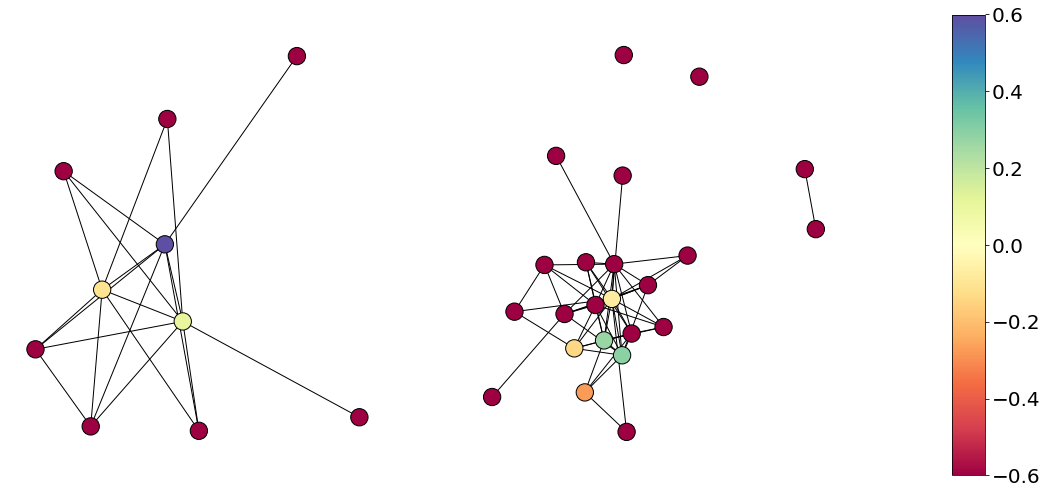

In [64]:
draw1(leftG, rightG, transformed_top_centrality, transformed_bottom_centrality, '')

In [58]:
top_centrality

{'ENSMUSP00000098768': 0.0074334414340244,
 'ENSMUSP00000114180': 0.050798294277257815,
 'ENSMUSP00000026845': 0.007186372837651325,
 'ENSMUSP00000128308': 0.004007034426631018,
 'ENSMUSP00000029812': 0.023319693396456117,
 'ENSMUSP00000009435': 0.0006999176094829773,
 'ENSMUSP00000057815': 0.006124589031878584,
 'ENSMUSP00000021674': 0.028605685780290643,
 'ENSMUSP00000096877': 0.0008262571793385613,
 'ENSMUSP00000000579': 0.009177466570649977}

In [59]:
bottom_centrality

{'ENSMUSP00000110489': 0.0036822913361765812,
 'ENSMUSP00000028735': 0.005113427400678447,
 'ENSMUSP00000069616': 0.02432298167977559,
 'ENSMUSP00000099733': 0.0016964738539705013,
 'ENSMUSP00000003687': 0.004875070124774992,
 'ENSMUSP00000031383': 0.010519527301217853,
 'ENSMUSP00000102710': 0.003936298578768505,
 'ENSMUSP00000021692': 0.022552836654222506,
 'ENSMUSP00000099576': 0.0024594010267871397,
 'ENSMUSP00000035539': 0.0022379662084743477,
 'ENSMUSP00000039586': 0.006483042392028455,
 'ENSMUSP00000000579': 0.009177466570649977,
 'ENSMUSP00000084794': 0.003562314510413869,
 'ENSMUSP00000059129': 0.005463449548057722,
 'ENSMUSP00000030626': 0.001154997932040444,
 'ENSMUSP00000034215': 0.0017652986171497772,
 'ENSMUSP00000029574': 0.003083025799183791,
 'ENSMUSP00000091374': 0.019113411499210677,
 'ENSMUSP00000094164': 0.0011215179881813298,
 'ENSMUSP00000048218': 0.03270156421531282,
 'ENSMUSP00000124201': 0.002231412756751737,
 'ENSMUSP00000079380': 0.033179187634589775,
 'ENSM

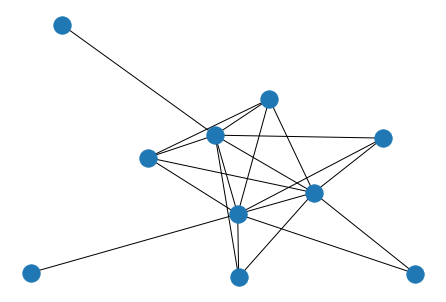

In [66]:
nx.draw(leftG,pos = nx.spring_layout(leftG, k=0.5, iterations=20))

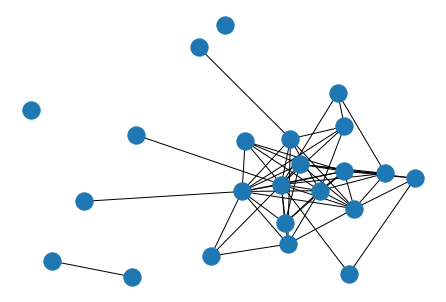

In [67]:
nx.draw(rightG,pos = nx.spring_layout(rightG, k=0.5, iterations=20))

In [68]:
# Figure 3: checking individual transcription factor redundancy

In [69]:
import numpy as np
import pandas as pd

from matplotlib import rcParams
import matplotlib.pyplot as plt
import seaborn as sns

file = "D:/OneDrive - University of Pittsburgh/PhD proposal/Noisy channel research/nonzero_10cutoff_facscountmatrix8dec.csv" # the file that will store the analysis results
adata_facs_df= pd.read_csv(file,index_col=0)

alltfdf=pd.read_csv("C:/Users/sruth/Box/Pitt/Tabula Muris senis- for proposal/Noisy channel-TMS research/trrust_rawdata.mouse_wheader.csv")

#fig1df=pd.read_csv('df_results_per_cell_fig1.csv')

In [70]:
adata_facs_df.head()

,0610007C21Rik,0610007L01Rik,0610007N19Rik,0610007P08Rik,0610007P14Rik,0610007P22Rik,0610009B22Rik,0610009D07Rik,0610009L18Rik,0610009O20Rik,...,Zufsp,Zw10,Zwint,Zxdc,Zyg11b,Zyx,Zzef1,Zzz3,age,celltype
18m,0.0,0.000000,0.0,0.0,0.0,0.0,0.334001,0.037076,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.04276,0.000000,0.000000,0.153797,18m,skeletal muscle satellite cell
18m,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,2.299186,0.0,0.0,...,0.0,0.0,0.000000,6.599676,0.00000,2.941003,0.000000,0.000000,18m,skeletal muscle satellite cell
18m,0.0,0.072408,0.0,0.0,0.0,0.0,0.000000,2.137391,0.0,0.0,...,0.0,0.0,0.038261,0.046321,0.00000,2.052351,0.000000,0.000000,18m,skeletal muscle satellite cell
18m,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.00000,0.140650,0.000000,0.000000,18m,skeletal muscle satellite cell
18m,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.00000,0.599470,0.053462,0.000000,18m,skeletal muscle satellite cell


In [71]:
preserved_TF=pd.read_csv("D:/OneDrive - University of Pittsburgh/PhD proposal/Noisy channel research/topTF_genes_0.4_0.2diff.csv")

compromised_TF=pd.read_csv("D:/OneDrive - University of Pittsburgh/PhD proposal/Noisy channel research/bottomTF_genes_0.4_0.2diff.csv")

In [72]:
compromised_TF

,Unnamed: 0,bottom_TFs
0,0,Mapk1
1,1,Nfkb2
2,2,Fus
3,3,Mdm2
4,4,Zhx3
5,5,Khdrbs1
6,6,Egr2
7,7,Raf1
8,8,Tardbp
9,9,Crebbp


In [73]:
yo_adata_df=adata_facs_df[adata_facs_df['age'].isin(['3m','24m'])]

y_adata_df=adata_facs_df[adata_facs_df['age'].isin(['3m'])]

o_adata_df=adata_facs_df[adata_facs_df['age'].isin(['24m'])]


In [74]:
# total counts (average) for preserved genes vs. compromised genes

In [75]:
y_adata_df.head()

,0610007C21Rik,0610007L01Rik,0610007N19Rik,0610007P08Rik,0610007P14Rik,0610007P22Rik,0610009B22Rik,0610009D07Rik,0610009L18Rik,0610009O20Rik,...,Zufsp,Zw10,Zwint,Zxdc,Zyg11b,Zyx,Zzef1,Zzz3,age,celltype
3m,1.761104,1.541098,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,1.522642,0.0,0.000000,1.806709,0.000000,0.000000,3m,skeletal muscle satellite cell
3m,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,3m,skeletal muscle satellite cell
3m,0.000000,1.788955,0.0,0.0,0.0,0.0,0.000000,0.384158,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.161871,1.352870,1.701163,0.289918,3m,skeletal muscle satellite cell
3m,0.000000,3.050026,0.0,0.0,0.0,0.0,0.000000,1.533476,0.0,0.000000,...,0.0,0.0,0.025267,0.0,0.000000,0.000000,0.000000,0.000000,3m,skeletal muscle satellite cell
3m,1.564775,0.000000,0.0,0.0,0.0,0.0,2.696855,0.817633,0.0,1.073734,...,0.0,0.0,0.000000,0.0,0.029860,0.719527,0.024443,0.000000,3m,skeletal muscle satellite cell


In [76]:
y_sum=[]
o_sum=[]
for i in preserved_TF['top_TFs']:
    #print('young ', y_adata_df[i].sum(),'aged ', o_adata_df[i].sum())
    y_sum.append(y_adata_df[i].sum())
    o_sum.append(o_adata_df[i].sum())

In [77]:
print(np.mean(y_sum))

730.5715052843111


In [78]:
print(np.mean(o_sum))

619.8499885565556


In [79]:
y_sum=[]
o_sum=[]
for i in compromised_TF['bottom_TFs']:
    #print('young ', y_adata_df[i].sum(),'aged ', o_adata_df[i].sum())
    y_sum.append(y_adata_df[i].sum())
    o_sum.append(o_adata_df[i].sum())

In [80]:
print(np.mean(y_sum))
print(np.mean(o_sum))

784.010058624824
574.8152334567797


In [32]:
# repressor activator, unknown - for top and bottom genes. - 2 slides to then make conclusion.
sns.set(font_scale = 2,style='white')

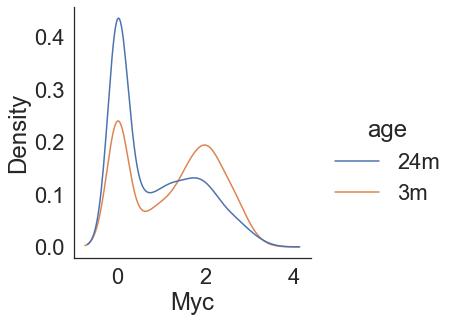

In [33]:
sns.displot(data=yo_adata_df, x='Myc', hue='age',kind='kde') #represses 

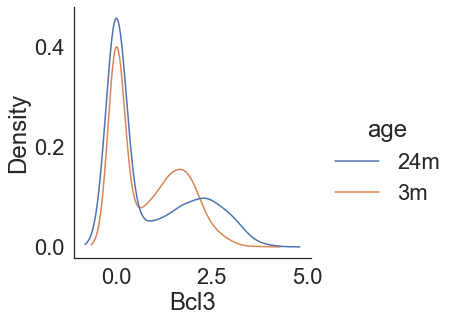

In [34]:
sns.displot(data=yo_adata_df, x='Bcl3', hue='age',kind='kde') #unknown Ubc

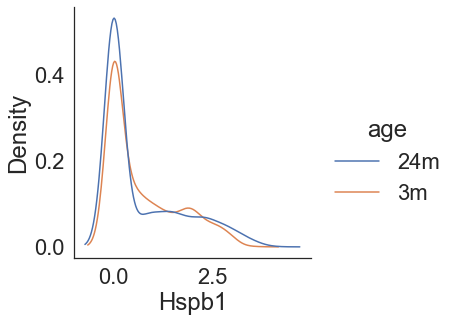

In [35]:
sns.displot(data=yo_adata_df, x='Hspb1', hue='age',kind='kde') # activates cdkn1a

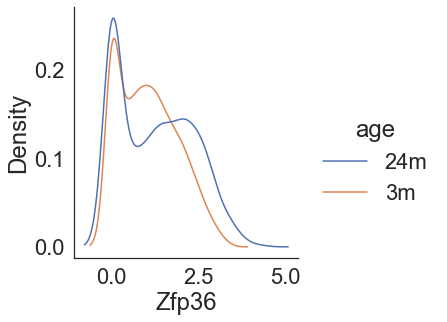

In [36]:
sns.displot(data=yo_adata_df, x='Zfp36', hue='age',kind='kde') # represses nfkb1

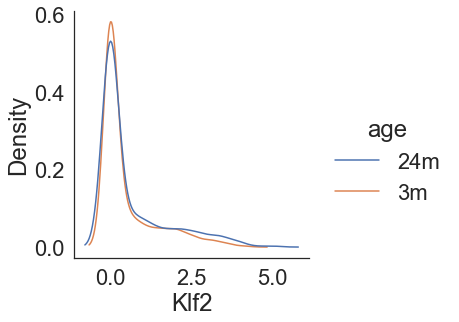

In [38]:
sns.displot(data=yo_adata_df, x='Klf2', hue='age',kind='kde') # activates Thbd

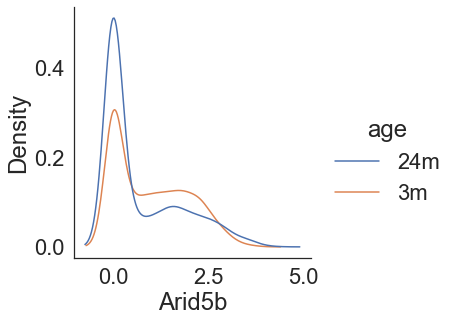

In [40]:
sns.displot(data=yo_adata_df, x='Arid5b', hue='age',kind='kde') # unknown Sox9

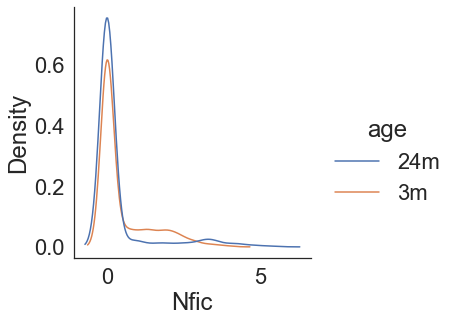

In [42]:
sns.displot(data=yo_adata_df, x='Nfic', hue='age',kind='kde') # unknown Pdgfra

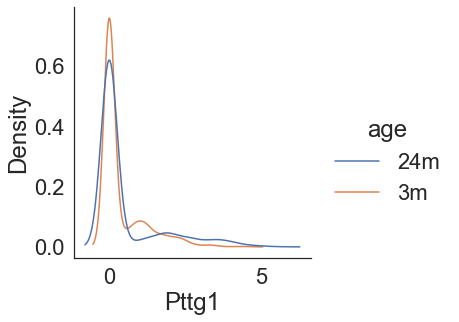

In [43]:
sns.displot(data=yo_adata_df, x='Pttg1', hue='age',kind='kde') # act Pttg1ip

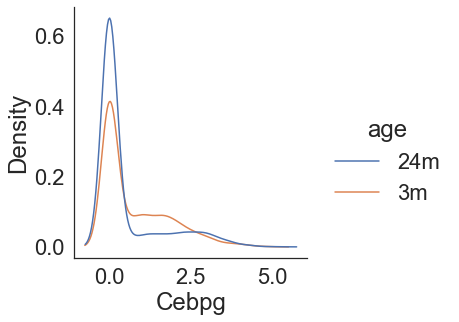

In [46]:
sns.displot(data=yo_adata_df, x='Cebpg', hue='age',kind='kde') # unknown il6

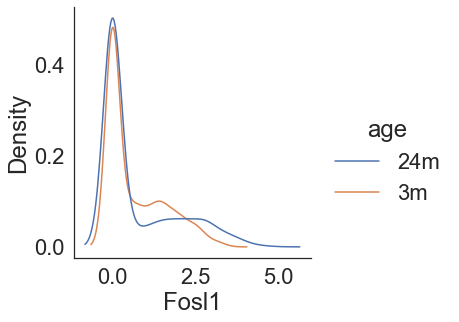

In [48]:
sns.displot(data=yo_adata_df, x='Fosl1', hue='age',kind='kde') # rep thbs1

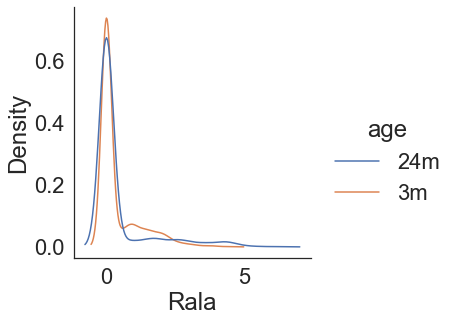

In [49]:
sns.displot(data=yo_adata_df, x='Rala', hue='age',kind='kde') # unk fos

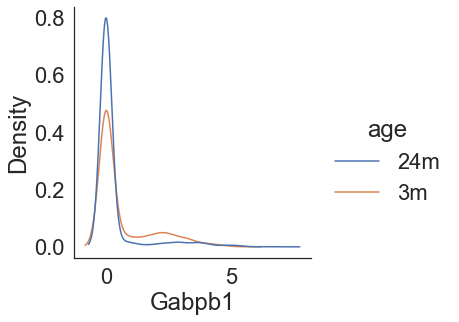

In [50]:
sns.displot(data=yo_adata_df, x='Gabpb1', hue='age',kind='kde') # unk sod3

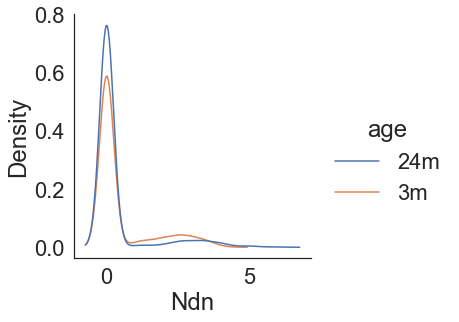

In [51]:
sns.displot(data=yo_adata_df, x='Ndn', hue='age',kind='kde') # unk myc

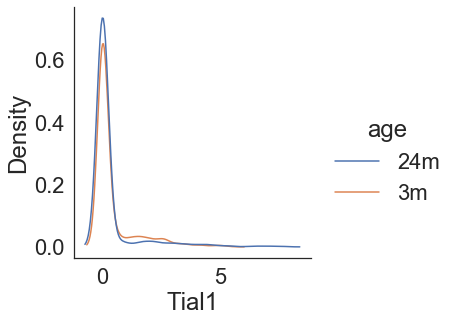

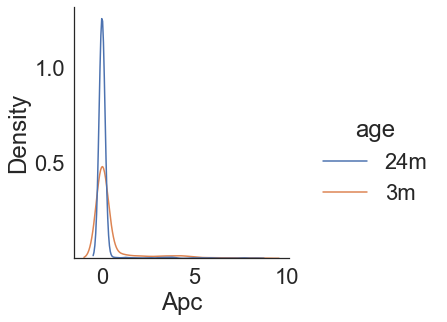

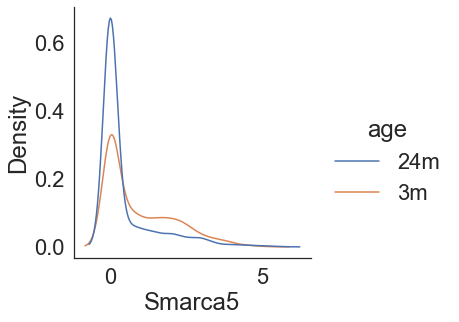

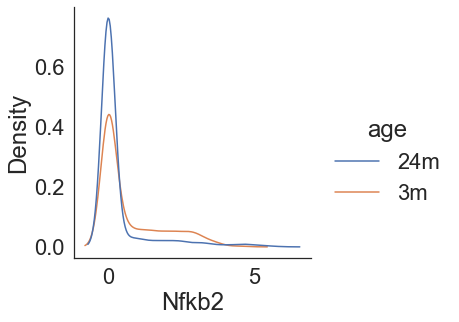

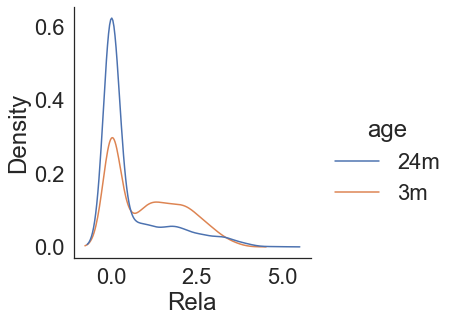

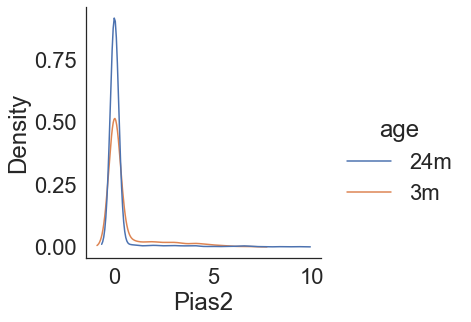

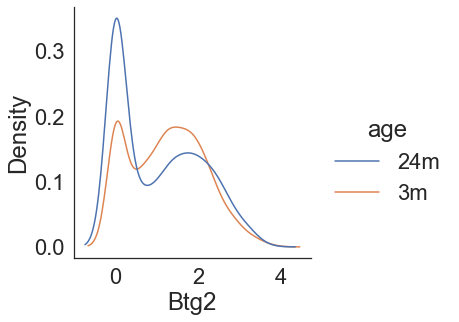

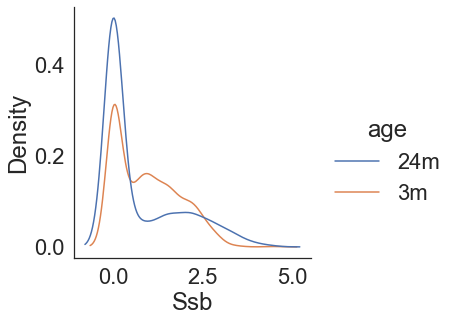

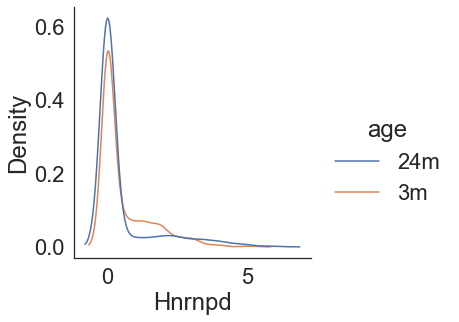

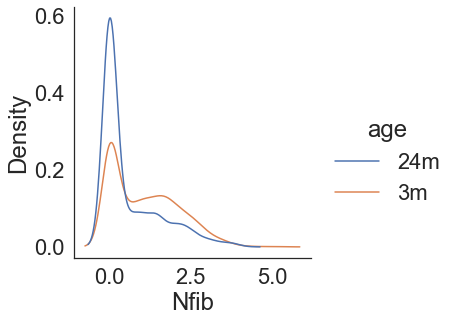

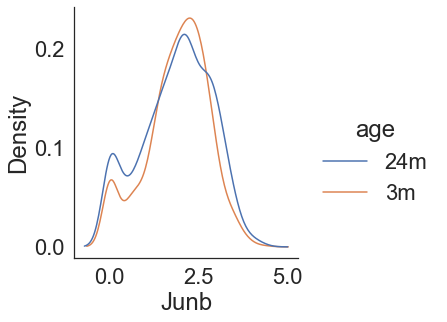

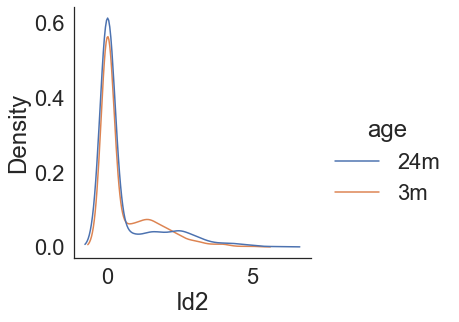

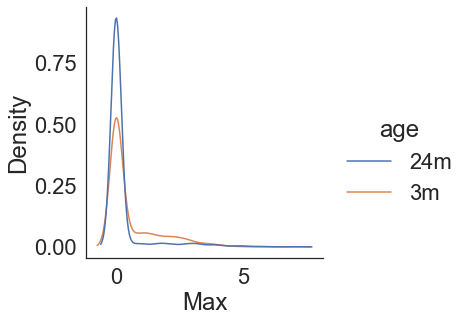

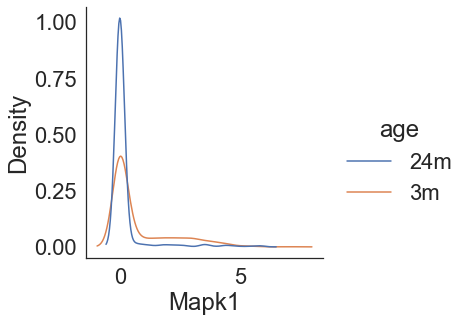

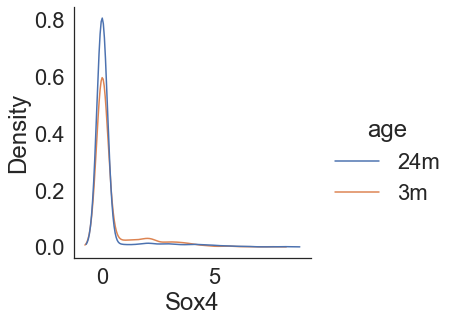

In [55]:
#bottom genes
sns.displot(data=yo_adata_df, x='Tial1', hue='age',kind='kde')
sns.displot(data=yo_adata_df, x='Apc', hue='age',kind='kde')
sns.displot(data=yo_adata_df, x='Smarca5', hue='age',kind='kde')
sns.displot(data=yo_adata_df, x='Nfkb2', hue='age',kind='kde')
sns.displot(data=yo_adata_df, x='Rela', hue='age',kind='kde')
sns.displot(data=yo_adata_df, x='Pias2', hue='age',kind='kde')
sns.displot(data=yo_adata_df, x='Btg2', hue='age',kind='kde')
sns.displot(data=yo_adata_df, x='Ssb', hue='age',kind='kde')
sns.displot(data=yo_adata_df, x='Hnrnpd', hue='age',kind='kde')
sns.displot(data=yo_adata_df, x='Nfib', hue='age',kind='kde')
sns.displot(data=yo_adata_df, x='Junb', hue='age',kind='kde')
sns.displot(data=yo_adata_df, x='Id2', hue='age',kind='kde')
sns.displot(data=yo_adata_df, x='Max', hue='age',kind='kde')
sns.displot(data=yo_adata_df, x='Mapk1', hue='age',kind='kde')
sns.displot(data=yo_adata_df, x='Sox4', hue='age',kind='kde')
